In [1]:
from src.pipelines import auto_image_prompting as ap, comics
from src.formatter.text import print_texts, print_list
from src.text.open_ai import OpenAITextGeneration, OpenAITextModelConfig, TextIllustratorAssistant
from src.images.stable_diffusion_api import StableDiffusionApi
from src.images.official_stable_diffusion import OficialStableDiffusionApi
from IPython.display import Image


# Refactor del splitter 
# Attention en la description the lo general a lo particular


In [2]:
NEGATIVE_TEMPLATE = (
'low quality, extra fingers, missing fingers',   
'bad anatomy, mutilations, deformations, ugly',
'text, too dark, too sharp, unclear, underexposed' 
'undeveloped, watermark ugly, low quality, missing fingers',
'too many fingers, missing limbs, extra limbs, warped, mutilated', 
'blurry, texts, watermarks, overexposed, too dark',
'disconected limbs, ((((mutated hands and fingers)))), missing limbs' 
'(((fake leg))), contortionist, contorted limbs, (body merged), disjointed' 
'floating limbs, (malformed hands), (((extra limb)), (((extra fingers))), ((bad anatomy))',
'(incomplete face), (scribble), (((disfigured))), dead, ((blurry)), (((incorrect)))',
'((deformed)), (mutated),(mutation), disgusting'
)

negative = ','.join(NEGATIVE_TEMPLATE)

tmodel = OpenAITextGeneration(model='text-davinci-003')
imodel = OficialStableDiffusionApi(save_seed=True, image_formatter=lambda u: Image(data = u))


In [3]:
story, frames = comics.pipeline(tmodel, 'A boy in the spaces', splitter_style='illustrated')
print_texts(story)
print('\n################################################################################################################\n')
print_list(frames)

Once upon a time , there was a brave little boy named Nick.
Nick was a very curious child, and often wondered what lay beyond the stars in the night sky.
One night, Nick decided that he would find out.
He made a spaceship out of old cardboard boxes and a few items he had lying around.
Nick then climbed inside the makeshift space ship and set off into the night.
Nick's journey was long and rough.
He encountered many obstacles, but he persevered and eventually arrived in a strange place.
He had made it to space! 

Nick was amazed by the sights he saw.
He encountered all sorts of strange creatures, and each one had a different story to tell.
After a while, Nick began to feel homesick.
He wanted to go back to Earth, but he was lost.
Suddenly, Nick heard a voice from behind him.
It was a friendly alien, named Zeeble, who offered to help him find his way back home.
Nick was filled with joy and thanked Zeeble for his help.
With the help of Zeeble, Nick soon made it back to Earth.
He thanked Z

In [9]:
description = ap.generate_entity_description(tmodel, story, 'Zeeble')
print_texts(description)

Zeeble has dark green skin and two large black eyes that have bright yellow pupils.
He has a small nose and a wide mouth with two rows of small, sharp teeth.
He has two antennae on the top of his head that are curved at the ends.
His body is thin and frail, and he has long arms and legs that are covered in wrinkles.
He is wearing a light brown robe with a hood that is trimmed with silver.
The robe has two pockets at the front, and he has a silver belt around his waist.
He is carrying a small silver box in one hand, and a walking stick in the other.
.


In [10]:
Formatter = """Drop each pronoun from the following text and enter the noun that is being replaced by the pronoun.

Text: {text}

Transformed Text:"""

text = tmodel.text2text(Formatter.format(text = description))
print_texts(text)

Zeeble has dark green skin and two large black eyes that have bright yellow pupils.
Zeeble has a small nose and a wide mouth with two rows of small, sharp teeth.
Zeeble has two antennae on the top of Zeeble's head that are curved at the ends.
Zeeble's body is thin and frail, and Zeeble has long arms and legs that are covered in wrinkles.
Zeeble is wearing a light brown robe with a hood that is trimmed with silver.
The robe has two pockets at the front, and Zeeble has a silver belt around Zeeble's waist.
Zeeble is carrying a small silver box in one hand, and a walking stick in the other.
.


In [7]:
image_description = ap.generate_image_description(tmodel, frames[0], story)
print_texts(image_description)

Nick standing in the middle of a star-filled sky, with an old cardboard box spaceship at his left side.
To Nick's right side, there is a friendly alien, Zeeble, smiling and gesturing with her arms outstretched, as if offering Nick a way home.
Behind them both, the stars twinkle in the night sky.
In the far corner of the image, a small planet can be seen, representing Earth.
.


In [8]:
text = tmodel.text2text(Formatter.format(text = image_description))
print_texts(text)

Nick standing in the middle of a star-filled sky, with an old cardboard box spaceship at his left side.
To Nick's right side, there is a friendly alien, Zeeble, smiling and gesturing with her arms outstretched, as if offering Nick a way home.
Behind them both, the stars twinkle in the night sky.
In the far corner of the image, a small planet can be seen, representing Earth.
.


......... generate by seed 352930807


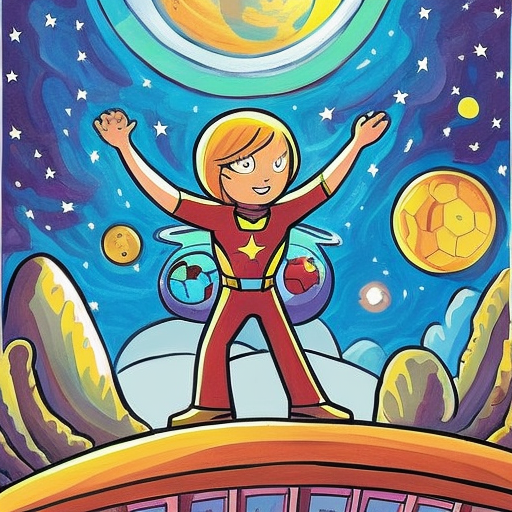

In [16]:
imodel.image_by_multi_prompt(
    ("Nick standing in the middle of a star-filled sky, with an old cardboard box spaceship at his left side.", 2),
    ("To Nick's right side, there is a friendly alien, Zeeble, smiling and gesturing with her arms outstretched, as if offering Nick a way home.", 1.7),
    ("In the far corner of the image, a small planet can be seen, representing Earth.", 1.7),
    # ("Nick with brown hair", 1),
    ("Nick is wearing a blue and white striped long-sleeved shirt and a pair of faded blue jeans", 1),
    # ("Zeeble has dark green skin and two large black eyes that have bright yellow pupils.", 1),
    # ("Zeeble has a small nose and a wide mouth with two rows of small, sharp teeth", 1)
    ("texts, watermarks, text, incorrect, blurry", -2),
    ("incomplete face, bad anatomy, deformed, disfigured, body merged", -2),
    ("disgusting, deformations, mutation, mutated, mutilated, ugly, low quality", -2)

)

In [8]:
ti_model = ap.WellDescribedModel(tmodel)
iter = ti_model.run(story, frames, 
    style="Studio ghibli, pixar and disney animation, long plane, 3 d, sharp, rendered in enscape, anime key art by greg rutkowski, bloom, Soft lighting",
    frame='photo in long plane'
)


In [5]:

image_prompt = next(iter)

print_texts(frames[0])
print('\n################################################################################################################\n')
print_texts(image_prompt)

imodel.text2image(image_prompt, neg=negative)


............. init inferences 🏭
............. the entities was detected 🕵🏽‍♂️
............. the entity zippo was described ✍🏽
............. the entity zaboo was described ✍🏽
............. the entity stars was described ✍🏽
............. the entity galaxies was described ✍🏽
............. the entity planets was described ✍🏽
............. the entity moons was described ✍🏽
............. the entity creatures was described ✍🏽
............. the entity zing was described ✍🏽
............. the entity spaces was described ✍🏽
............. the entity cultures was described ✍🏽
............. the entity customs was described ✍🏽
............. analyzing 0/8 frame 🧐
............. the image description was generated 🤩
Once upon a time, there was a brave and adventurous boy called Zippo.
He lived on a small planet called Zaboo in the far corners of the universe.
.

################################################################################################################

A photo in long plane in the 

In [6]:
image_prompt = next(iter)

print_texts(frames[1])
print('\n################################################################################################################\n')
print_texts(image_prompt)

imodel.text2image(image_prompt, neg=negative)

............. analyzing 1/8 frame 🧐
............. the image description was generated 🤩
One day, Zippo decided to explore the universe and set off on a journey to the stars.
He travelled through galaxies, past planets and moons, until he reached the edge of the universe.
.

################################################################################################################

A photo in long plane in the Studio ghibli, pixar and disney animation, long plane, 3 d, sharp, rendered in enscape, anime key art by greg rutkowski, bloom, Soft lighting style of Zippo, standing at the edge of the universe and looking out into the endlessness of space.
He is wearing his navy blue hoodie, black jeans, and white sneakers.
His dark brown hair is short and his brown eyes are filled with determination.
He is standing atop a platform of rocks, looking out into the vastness of space.
The night sky is filled with stars of different sizes and colors, twinkling in the darkness.
Galaxies can be se

In [7]:
image_prompt = next(iter)

print_texts(frames[2])
print('\n################################################################################################################\n')
print_texts(image_prompt)

imodel.text2image(image_prompt, neg=negative)

............. analyzing 2/8 frame 🧐
............. the image description was generated 🤩
As he looked into the vastness of space, he saw something shining in the distance.
He decided to investigate and set off in that direction.
.

################################################################################################################

A photo in long plane in the Studio ghibli, pixar and disney animation, long plane, 3 d, sharp, rendered in enscape, anime key art by greg rutkowski, bloom, Soft lighting style of Zippo standing in space, surrounded by stars, galaxies, planets and moons.
He is dressed in a navy blue hoodie with a logo on the front, black jeans, and white sneakers.
He has a determined look on his face, ready for his next adventure.
The background is filled with stars, ranging in size and brightness, with some twinkling in the night sky.
Galaxies swirl in the background with shades of blue, purple, pink, and yellow.
Planets are illuminated in a bright white light, w

In [8]:
image_prompt = next(iter)

print_texts(frames[3])
print('\n################################################################################################################\n')
print_texts(image_prompt)

imodel.text2image(image_prompt, neg=negative)

............. analyzing 3/8 frame 🧐
............. the image description was generated 🤩
After a long journey, Zippo found himself in an unknown area of space.
He was surrounded by strange creatures that he had never seen before.
He felt scared but also excited.
.

################################################################################################################

A photo in long plane in the Studio ghibli, pixar and disney animation, long plane, 3 d, sharp, rendered in enscape, anime key art by greg rutkowski, bloom, Soft lighting style of Zippo standing in an unknown area of space, surrounded by strange creatures of all sizes and shapes.
He is wearing a navy blue hoodie with a logo on the front, black jeans, and white sneakers.
He stands with a determined look on his face, as if he is ready for his next adventure.
The creatures around him are all humanoid in shape, with large heads and two arms and two legs.
They have large, round eyes and long antennae on their heads.
So

In [9]:
prompt = """
((Zippy stands confidently in front of a spaceship, with a starry night sky, a village and an alien in a cage behind him)). \
Zippy standing in front of a large spaceship with a wide open door. \
Zippy is standing with one foot in the ship and the other out, facing forward. \
He is looking ahead with a determined expression. \
Behind him is a starry night sky and a small village in the distance. \
In front of him is the spacecraft, with a control panel of buttons, switches and levers visible inside the doorway. \
On the right side of the image, a small alien creature can be seen inside a glass cage. \
(Zippy is a brave young boy with short, dark hair and big brown eyes. \
He is wearing a red shirt and blue jeans with a brown belt. \
He has a determined expression on his face and his hands are clenched in a fist, ready for action. \
He looks determined and ready to take on any challenge that comes his way. \
)(Alien creature has an oval shaped head with large, black eyes, a small nose, and a slightly curved mouth. \
Its body is thin and has two thin arms with four-fingered hands. \
It has two spindly legs with two-toed feet. \
Its skin is a pale gray color and its head is covered in short, dark gray fur. \
It is wearing a dark gray jumpsuit with a yellow stripe down the front. \
The jumpsuit has a hood with two antennae sticking out from the top. \
) (((Studio ghibli, pixar and disney animation, long plane, 3 d, sharp, rendered in enscape, anime key art by greg rutkowski, bloom, Soft lighting))). \
.
"""

image_prompt = """\
Photo in long plane of Zippy standing in front of a large spaceship with a wide open door. \
Zippy is standing with one foot in the ship and the other out, facing forward. \
He is looking ahead with a determined expression. \
Behind him is a starry night sky and a small village in the distance. \
In front of him is the spacecraft, with a control panel of buttons, switches and levers visible inside the doorway. \
On the right side of the image, a small alien creature can be seen inside a glass cage. \
Zippy is a brave young boy with short, dark hair and big brown eyes. \
He is wearing a red shirt and blue jeans with a brown belt. \
He has a determined expression on his face and his hands are clenched in a fist, ready for action. \
He looks determined and ready to take on any challenge that comes his way. \
Studio ghibli, pixar and disney animation, long plane, 3 d, sharp, rendered in enscape, anime key art by greg rutkowski, bloom, Soft lighting. \
"""




a = auto_image_prompting.FrameImagePrompt(
    frame = 'photo in long plane',
    subject='Zippy stands confidently in front of a spaceship, with a starry night sky, a village and an alien in a cage behind him',
    styles='Studio ghibli, pixar and disney animation, long plane, 3 d, sharp, rendered in enscape, anime key art by greg rutkowski, bloom, Soft lighting',
    descriptions=["""Zippy standing in front of a large spaceship with a wide open door. \
Zippy is standing with one foot in the ship and the other out, facing forward. \
He is looking ahead with a determined expression. \
Behind him is a starry night sky and a small village in the distance. \
In front of him is the spacecraft, with a control panel of buttons, switches and levers visible inside the doorway. \
On the right side of the image, a small alien creature can be seen inside a glass cage.""", """Zippy is a brave young boy with short, dark hair and big brown eyes. \
He is wearing a red shirt and blue jeans with a brown belt. \
He has a determined expression on his face and his hands are clenched in a fist, ready for action. \
He looks determined and ready to take on any challenge that comes his way."""]
)


imodel.text2image(a.prompt, neg=negative)

NameError: name 'auto_image_prompting' is not defined

In [ ]:
def structure(f: auto_image_prompting.FrameImagePrompt):
    return f"A {f.frame} in the {f.styles} style where {'In Addition'.join(f.descriptions)}"

imodel.text2image(structure(a), neg=negative)

......... generate by seed 3789834189
